In [9]:
import os, sys

# Move one level up to Source Code
os.chdir(r"C:\Users\husseien\Desktop\340915149_322754953\Source Code")

# Optional: make sure Python can see this folder
sys.path.insert(0, os.getcwd())

print("CWD now:", os.getcwd())
print("sys.path[0]:", sys.path[0])
import pandas as pd
import os
import torch
import os, sys

# Add Source Code folder to sys.path
BASE_DIR = r"C:\Users\husseien\Desktop\340915149_322754953\Source Code"

if BASE_DIR not in sys.path:
    sys.path.insert(0, BASE_DIR)

# Optional: change working directory (recommended)
if os.getcwd() != BASE_DIR:
    os.chdir(BASE_DIR)

# Now you can import setup_paths
import setup_paths  # this will run the code in setup_paths.py


import os

# Base data folder
DATA_DIR = r"C:\Users\husseien\Desktop\340915149_322754953\Source Code\data"

# Path to labeled train.csv
TRAIN_CSV = os.path.join(DATA_DIR, "train.csv")

# Path to folder containing all raw CSV files
FILES_DIRECTORY = os.path.join(DATA_DIR, "unlabeled", "unlabeled")

# Check
print("TRAIN_CSV exists:", os.path.exists(TRAIN_CSV))
print("FILES_DIRECTORY exists:", os.path.exists(FILES_DIRECTORY))
print("Example CSVs:", os.listdir(FILES_DIRECTORY)[:5])


from CNN.cnn_utils import get_train_data
from LSTM.lstm_autoencoder import LSTM_AE
from LSTM.lstm_autoencoders_utils import train_lstm_autoencoder
from RF_XGB.RandomForest import train_random_forest
from models_utils.Datasets import *
from models_utils.GLOBALS import *
from models_utils.utils import get_results

CWD now: C:\Users\husseien\Desktop\340915149_322754953\Source Code
sys.path[0]: C:\Users\husseien\Desktop\340915149_322754953\Source Code
TRAIN_CSV exists: True
FILES_DIRECTORY exists: True
Example CSVs: ['0.csv', '1.csv', '10.csv', '100.csv', '1000.csv']


In [10]:
# get train data
train_data = pd.read_csv(TRAIN_CSV)
data_type_1 = train_data[train_data['sensor'] == 'vicon']['id'].tolist()
data_type_2 = train_data[train_data['sensor'] == 'smartwatch']['id'].tolist()

In [11]:
# sizes of padding/cutting
embedding_size = 128
target_size_type1 = 1000
target_size_type2 = 400

In [ ]:
# train or load models
train_or_load = 'load'
if train_or_load == 'train':
    Type1LSTMAutoencoder = train_lstm_autoencoder(data_type_1, '1', target_size_type1, embedding_size, 0.000004, 256, 5)
    Type2LSTMAutoencoder = train_lstm_autoencoder(data_type_2, '2', target_size_type2, embedding_size, 0.000004, 256, 5)
elif train_or_load == 'load':
    Type1LSTMAutoencoder = LSTM_AE(target_size_type1, 3, embedding_size).to(device)
    Type1LSTMAutoencoder.load_state_dict(torch.load('Type1LSTMAutoencoder.pth'))
    Type2LSTMAutoencoder = LSTM_AE(target_size_type2, 3, embedding_size).to(device)
    Type2LSTMAutoencoder.load_state_dict(torch.load('Type2LSTMAutoencoder.pth'))
else:
    raise ValueError('Wrong train or load')

In [21]:
# calculate or load train data
embedding_names = [f'embedding_feature_{i + 1}' for i in range(128)]
calculate_or_load_train_data = 'load'
if calculate_or_load_train_data == 'calculate':
    data_type_1, data_type_2 = get_train_data('EmbeddingRF', Type1LSTMAutoencoder, Type2LSTMAutoencoder,
                                              target_size_type1, target_size_type2, is_autoencoder=True)
elif calculate_or_load_train_data == 'load':
    data_type_1 = pd.read_csv('EmbeddingRF_type1.csv')
    data_type_2 = pd.read_csv('EmbeddingRF_type2.csv')

In [22]:
# train rf
cols_to_drop_type_1 = ['activity', 'dominant_freq_y', 'count_x', 'count_y', 'count_z', 'dominant_freq_x']
rf_classifier_type1, label_encoder_type1 = train_random_forest(data_type_1, cols_to_drop_type_1, n_estimators=200)
cols_to_drop_type_2 = ['activity', 'dominant_freq_y', 'count_x', 'count_y', 'count_z', 'dominant_freq_x']
rf_classifier_type2, label_encoder_type2 = train_random_forest(data_type_2, cols_to_drop_type_2, n_estimators=200)

Accuracy: 0.9448986846782794
Log Loss: 0.47965187312775687
Accuracy: 0.9613152804642167
Log Loss: 0.32090688219337876


In [23]:
# get and save results for test data
results = get_results(Type1LSTMAutoencoder, Type2LSTMAutoencoder, rf_classifier_type1, rf_classifier_type2,
                      label_encoder_type1, label_encoder_type2, target_size_type1, target_size_type2,
                      cols_to_drop_type_1, cols_to_drop_type_2, embedding_names)
results.to_csv('results_Embedding_RF.csv', index=False)

Processed 100/74744 files in 2.17 seconds.
Processed 200/74744 files in 2.70 seconds.
Processed 300/74744 files in 3.81 seconds.
Processed 400/74744 files in 3.68 seconds.
Processed 500/74744 files in 3.76 seconds.
Processed 600/74744 files in 4.71 seconds.
Processed 700/74744 files in 4.28 seconds.
Processed 800/74744 files in 3.77 seconds.
Processed 900/74744 files in 3.83 seconds.
Processed 1000/74744 files in 3.40 seconds.
Processed 1100/74744 files in 3.63 seconds.
Processed 1200/74744 files in 3.91 seconds.
Processed 1300/74744 files in 4.03 seconds.
Processed 1400/74744 files in 4.37 seconds.
Processed 1500/74744 files in 4.08 seconds.
Processed 1600/74744 files in 3.89 seconds.
Processed 1700/74744 files in 4.00 seconds.
Processed 1800/74744 files in 4.07 seconds.
Processed 1900/74744 files in 3.76 seconds.
Processed 2000/74744 files in 4.20 seconds.
Processed 2100/74744 files in 4.47 seconds.
Processed 2200/74744 files in 4.11 seconds.
Processed 2300/74744 files in 3.94 second

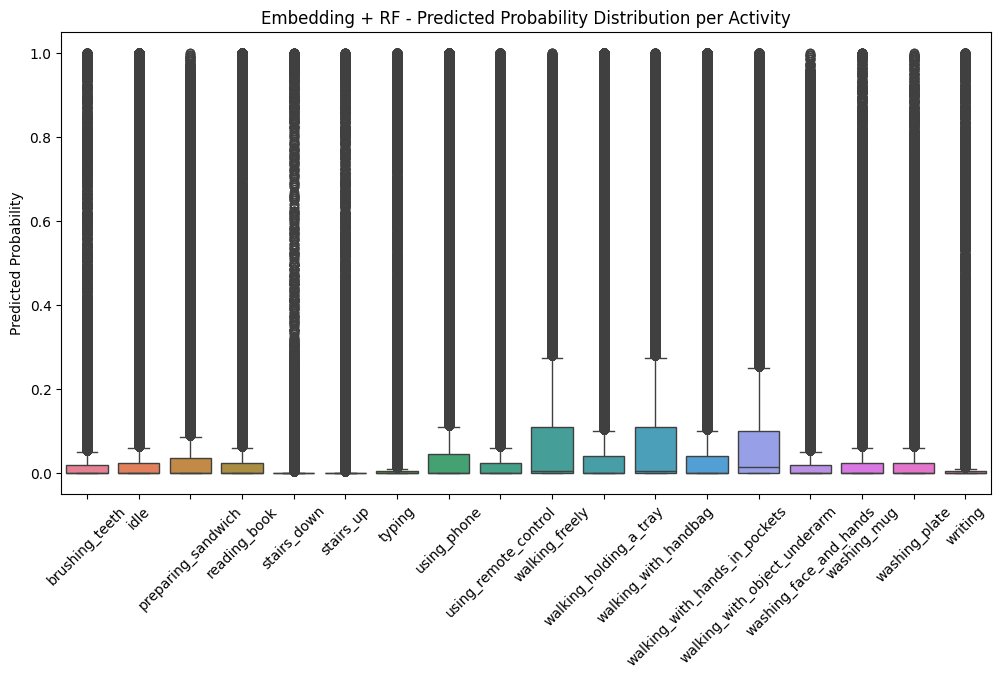

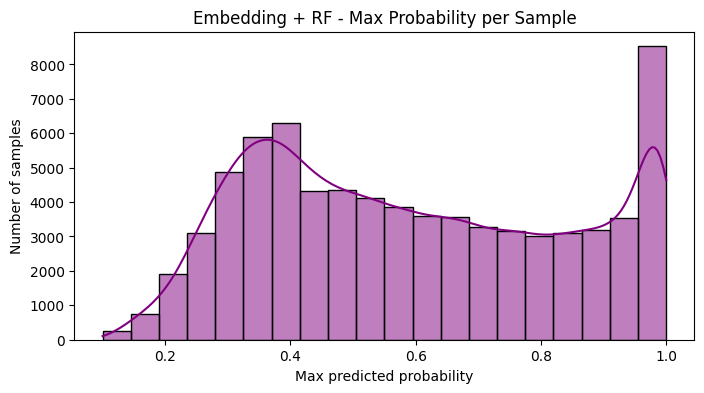

C:\Users\husseien\AppData\Local\Temp\ipykernel_26088\4029345498.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_classes.index, y=top_classes.values, palette='Purples')


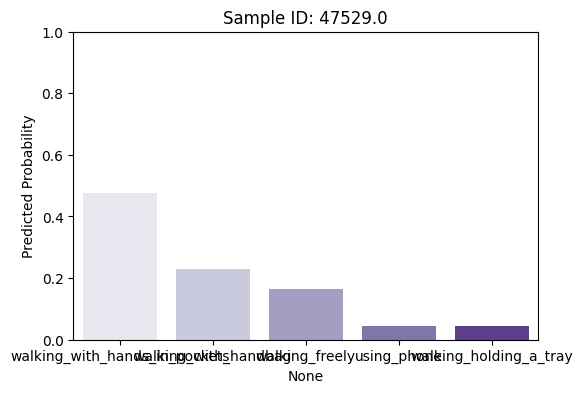

C:\Users\husseien\AppData\Local\Temp\ipykernel_26088\4029345498.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_classes.index, y=top_classes.values, palette='Purples')


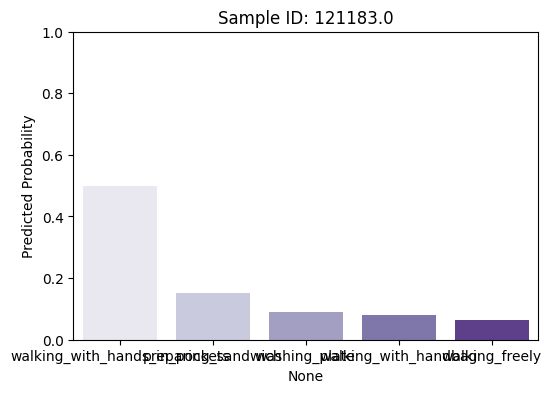

C:\Users\husseien\AppData\Local\Temp\ipykernel_26088\4029345498.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_classes.index, y=top_classes.values, palette='Purples')


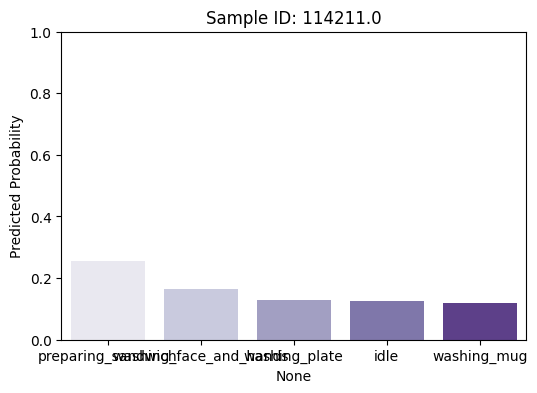

C:\Users\husseien\AppData\Local\Temp\ipykernel_26088\4029345498.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_classes.index, y=top_classes.values, palette='Purples')


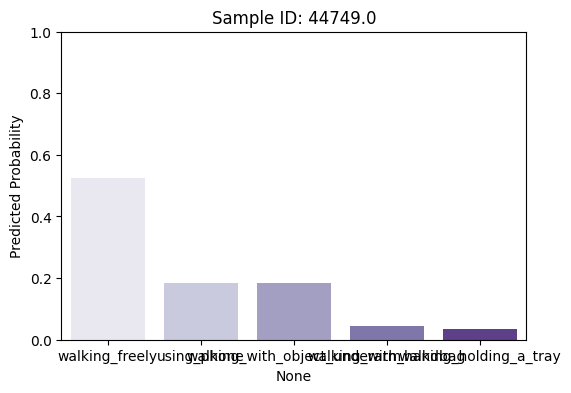

C:\Users\husseien\AppData\Local\Temp\ipykernel_26088\4029345498.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_classes.index, y=top_classes.values, palette='Purples')


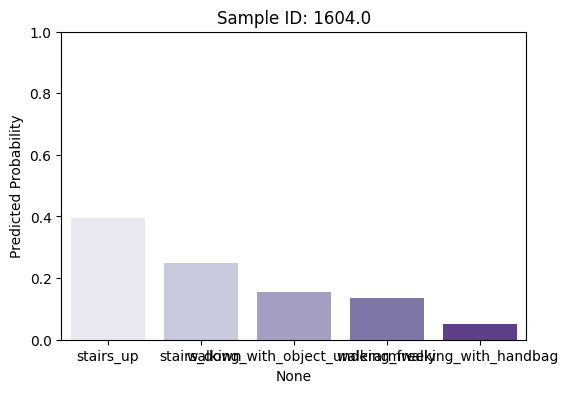

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load results
results = pd.read_csv('results_Embedding_RF.csv')

# Columns with activities
activity_cols = [c for c in results.columns if c != 'sample_id']

# 1. Distribution of predicted probabilities for each activity
plt.figure(figsize=(12,6))
sns.boxplot(data=results[activity_cols])
plt.xticks(rotation=45)
plt.title("Embedding + RF - Predicted Probability Distribution per Activity")
plt.ylabel("Predicted Probability")
plt.show()

# 2. Histogram of max probability per sample (model confidence)
max_probs = results[activity_cols].max(axis=1)
plt.figure(figsize=(8,4))
sns.histplot(max_probs, bins=20, kde=True, color='purple')
plt.title("Embedding + RF - Max Probability per Sample")
plt.xlabel("Max predicted probability")
plt.ylabel("Number of samples")
plt.show()

# 3. Top 5 predicted classes per random sample
sample = results.sample(5)
for _, row in sample.iterrows():
    top_classes = row[activity_cols].sort_values(ascending=False)[:5]
    plt.figure(figsize=(6,4))
    sns.barplot(x=top_classes.index, y=top_classes.values, palette='Purples')
    plt.title(f"Sample ID: {row['sample_id']}")
    plt.ylabel("Predicted Probability")
    plt.ylim(0,1)
    plt.show()
